In [2]:

import glob
import os

import pandas as pd
for file_path in glob.glob(os.path.join('../dataset/real-time/test_after_attack_preprocessed', "*.csv")):
    filename = os.path.basename(file_path)
    filename = filename.replace('after_attack_','')
    print(filename)
    df = pd.read_csv(file_path)
    df.to_csv(f'{filename}',index=False)


barley.csv
chainpaint.csv
curve.csv
earningfarm.csv
gooddollar.csv
nfttrader.csv
peapods.csv
sturdy.csv


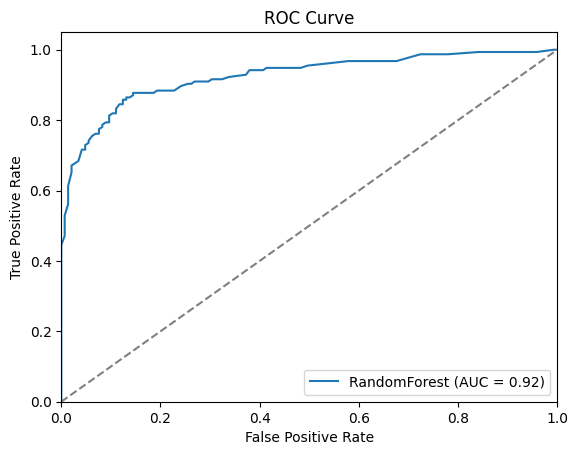

AUC Score: 0.92


In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Step 1: Create a sample dataset and train-test split
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 3: Get predicted probabilities
y_probs = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Step 4: Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Step 5: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Step 6: Print AUC score
print(f"AUC Score: {auc_score:.2f}")
